# Preparing the Data

In [38]:
import pandas as pd
import numpy as np

import seaborn as sns

In [39]:
df = pd.read_csv('DATA/fake_reg.csv')

In [40]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

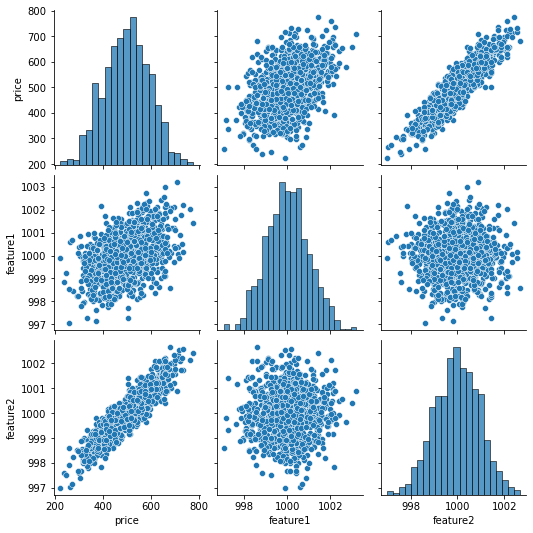

In [41]:
sns.pairplot(df)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[['feature1','feature2']].values

In [44]:
y = df['price'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.shape

(700, 2)

In [47]:
X_test.shape

(300, 2)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
scaler.fit(X_train)

MinMaxScaler()

In [51]:
X_train = scaler.transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

# Creating and Training the Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
# model = Sequential([Dense(4,activation='relu'),
#                   Dense(2,activation='relu'),
#                   Dense(1)])

In [55]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [56]:
model.fit(x=X_train, y=y_train, epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 714us/step - loss: 250546.3886
Epoch 2/250
22/22 [==============================] - 0s 619us/step - loss: 255748.7480
Epoch 3/250
22/22 [==============================] - 0s 619us/step - loss: 258905.9293
Epoch 4/250
22/22 [==============================] - 0s 619us/step - loss: 258956.1549
Epoch 5/250
22/22 [==============================] - 0s 619us/step - loss: 253802.6923
Epoch 6/250
22/22 [==============================] - 0s 619us/step - loss: 253862.8200
Epoch 7/250
22/22 [==============================] - 0s 619us/step - loss: 252190.7364
Epoch 8/250
22/22 [==============================] - 0s 619us/step - loss: 256542.5849
Epoch 9/250
22/22 [==============================] - 0s 619us/step - loss: 255846.1658
Epoch 10/250
22/22 [==============================] - 0s 619us/step - loss: 253940.0034
Epoch 11/250
22/22 [==============================] - 0s 619us/step - loss: 255197.2846
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 619us/step - loss: 50689.8635
Epoch 94/250
22/22 [==============================] - 0s 619us/step - loss: 43984.8291
Epoch 95/250
22/22 [==============================] - 0s 619us/step - loss: 42497.4012
Epoch 96/250
22/22 [==============================] - 0s 619us/step - loss: 38433.7955
Epoch 97/250
22/22 [==============================] - 0s 572us/step - loss: 33556.2102
Epoch 98/250
22/22 [==============================] - 0s 571us/step - loss: 29166.7168
Epoch 99/250
22/22 [==============================] - 0s 572us/step - loss: 24983.8633
Epoch 100/250
22/22 [==============================] - 0s 571us/step - loss: 22889.2010
Epoch 101/250
22/22 [==============================] - 0s 619us/step - loss: 18908.8894
Epoch 102/250
22/22 [==============================] - 0s 572us/step - loss: 16275.2658
Epoch 103/250
22/22 [==============================] - 0s 619us/step - loss: 12647.1629
Epoch 104/250
22/22 [==============================]

22/22 [==============================] - 0s 619us/step - loss: 563.7485
Epoch 188/250
22/22 [==============================] - 0s 619us/step - loss: 540.8395
Epoch 189/250
22/22 [==============================] - 0s 619us/step - loss: 549.1228
Epoch 190/250
22/22 [==============================] - 0s 571us/step - loss: 499.1587
Epoch 191/250
22/22 [==============================] - ETA: 0s - loss: 421.777 - 0s 619us/step - loss: 470.3610
Epoch 192/250
22/22 [==============================] - 0s 572us/step - loss: 442.2690
Epoch 193/250
22/22 [==============================] - 0s 619us/step - loss: 426.4117
Epoch 194/250
22/22 [==============================] - 0s 619us/step - loss: 475.7106
Epoch 195/250
22/22 [==============================] - 0s 619us/step - loss: 427.0367
Epoch 196/250
22/22 [==============================] - 0s 667us/step - loss: 395.8798
Epoch 197/250
22/22 [==============================] - 0s 666us/step - loss: 395.1363
Epoch 198/250
22/22 [=====================

In [57]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

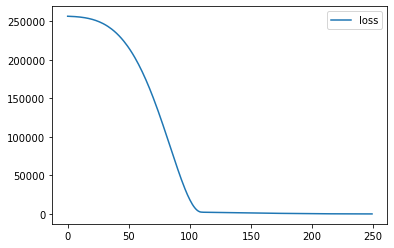

In [58]:
loss_df.plot()

# Model Evaluation

In [59]:
model.evaluate(X_test,y_test,verbose=0)

29.751649856567383

In [60]:
model.evaluate(X_train,y_train,verbose=0)

29.018091201782227

In [61]:
test_predictions = model.predict(X_test)

In [62]:
test_predictions

array([[407.8016 ],
       [621.0694 ],
       [590.0858 ],
       [571.5956 ],
       [371.28976],
       [577.9124 ],
       [516.30176],
       [459.88937],
       [549.1162 ],
       [448.46475],
       [609.5524 ],
       [546.91187],
       [421.39355],
       [411.59863],
       [646.8074 ],
       [438.7208 ],
       [507.55173],
       [657.7234 ],
       [659.6909 ],
       [563.88257],
       [339.01846],
       [446.52228],
       [386.04233],
       [381.8157 ],
       [565.5149 ],
       [609.08746],
       [532.19135],
       [429.73672],
       [653.00275],
       [415.89218],
       [443.8035 ],
       [485.8128 ],
       [440.07474],
       [678.6275 ],
       [425.9914 ],
       [420.45593],
       [500.868  ],
       [549.5681 ],
       [510.84665],
       [399.31033],
       [615.95337],
       [418.50882],
       [602.1815 ],
       [446.63876],
       [502.31802],
       [578.81   ],
       [664.4667 ],
       [490.47446],
       [322.49088],
       [486.2322 ],


In [63]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [67]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [68]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [70]:
pred_df.columns = ['Test True Y','Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

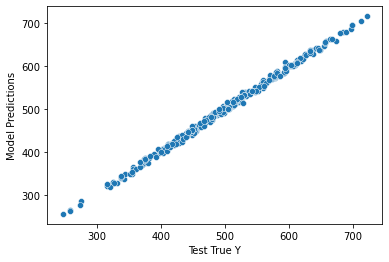

In [71]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# average of how far off we are

4.451529541120898

In [75]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [77]:
new_gem = [[998,1000]]

In [79]:
new_gem = scaler.transform(new_gem)

In [80]:
model.predict(new_gem)

array([[423.05807]], dtype=float32)

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save('my_gem_model.h5')

In [83]:
later_model = load_model('my_gem_model.h5')

In [84]:
later_model.predict(new_gem)

array([[423.05807]], dtype=float32)